In [1]:
import colour
import color_correction
import numpy as np
import os
import cv2
import imageio
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Users\ecoplants\Desktop"
file = r"T_20220908_Albedo_2K.png"
img_path = r"\\EcoPlants-AI\material_scan\双目\20220908色卡\out_test\T_20220908色卡_Albedo_4K.png"

uint16


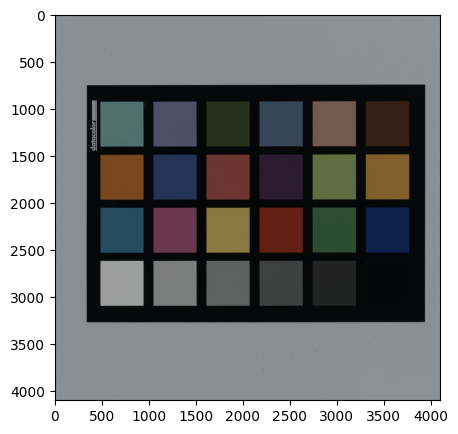

In [3]:
# img = cv2.imread(os.path.join(path, file), cv2.IMREAD_UNCHANGED)
img = cv2.imdecode(np.fromfile(img_path,dtype=np.uint8),-1)
print(img.dtype)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.astype(np.float32) / 65535

plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.show()


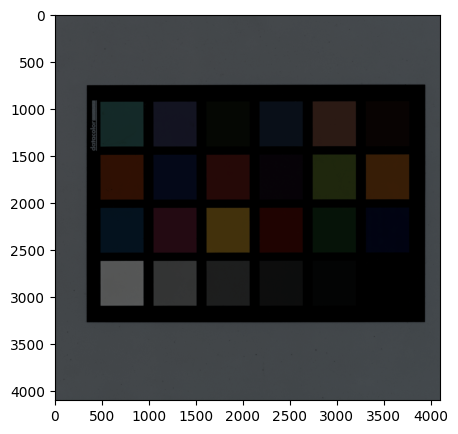

In [4]:

img = colour.cctf_decoding(img)

plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.show()

0.155296462621


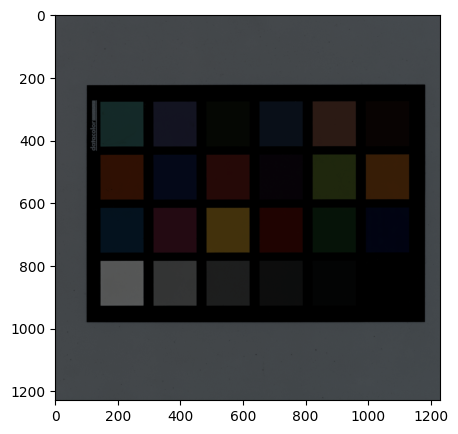

0.155328704101


In [5]:
print(img.mean())
# img, ratio = color_correction.auto_bright(img, dst_avg = 0.6, verbose=True)
img[img>1] = 1

img_resize = cv2.resize(img, (0, 0), fx = 0.3, fy = 0.3)
plt.figure(figsize=(5, 5))
plt.imshow(img_resize)
plt.show()
# img_resize = colour.cctf_decoding(img_resize)
print(img_resize.mean())
swatch = color_correction.getColorCorrectionSwatches(img_resize, auto_shink = False, IMAGE_BLUR = 13, verbose = False)

In [6]:
image_corrected = color_correction.correction(img_resize, swatch)

IndexError: tuple index out of range

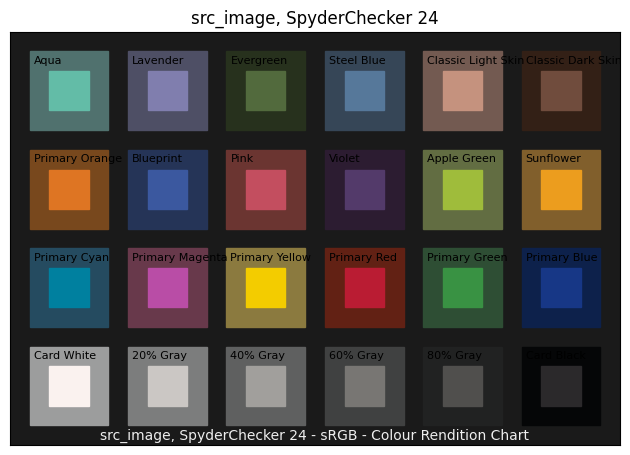

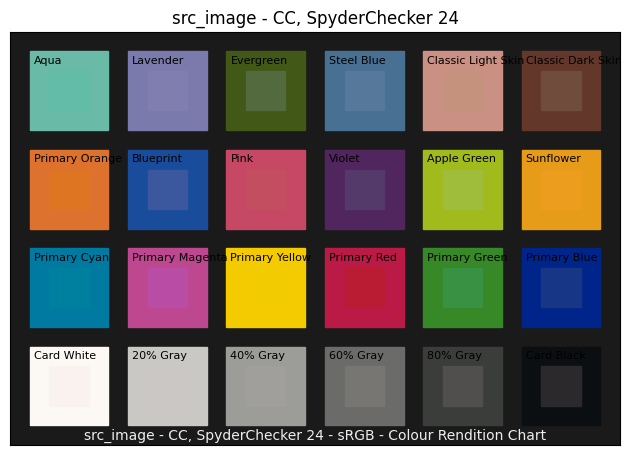

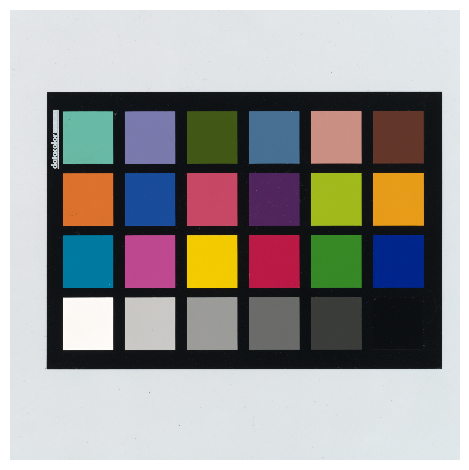

In [ ]:
image_corrected = color_correction.correction(img, np.array(swatch), verbose = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


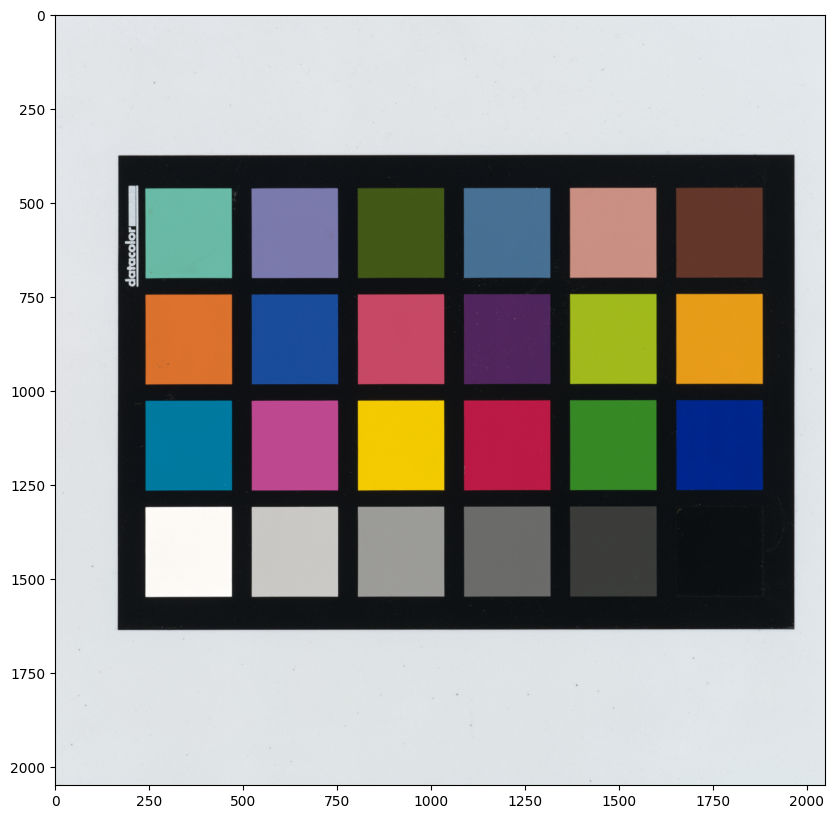

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(colour.cctf_encoding(image_corrected))
plt.show()

In [ ]:
np.array(swatch)

array([[ 0.08096577,  0.16376239,  0.15731443],
       [ 0.07537588,  0.07827312,  0.13047837],
       [ 0.02012997,  0.03017766,  0.01253897],
       [ 0.03653758,  0.06128013,  0.09601088],
       [ 0.17005646,  0.10303078,  0.08164581],
       [ 0.03342289,  0.01454933,  0.00807866],
       [ 0.18659051,  0.06501311,  0.01252347],
       [ 0.0181607 ,  0.03479557,  0.09576184],
       [ 0.14638494,  0.03538135,  0.03066122],
       [ 0.02499889,  0.01166911,  0.03021806],
       [ 0.12176183,  0.15319347,  0.05384909],
       [ 0.21853021,  0.11484501,  0.02558243],
       [ 0.01858209,  0.07120699,  0.11800722],
       [ 0.13858739,  0.04042657,  0.07112212],
       [ 0.25947702,  0.19416529,  0.05020078],
       [ 0.12308244,  0.01493754,  0.0071963 ],
       [ 0.02712514,  0.07546394,  0.03389932],
       [ 0.00412921,  0.01529665,  0.07112196],
       [ 0.33293086,  0.33644727,  0.3353294 ],
       [ 0.20228381,  0.20598757,  0.20613247],
       [ 0.11437832,  0.11750543,  0.117